In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np
from disturbances import IntegratedWhiteNoise
import os
from constants import *
from diff_calc import wind_force, vector_to_xy_components, get_mass_matrix
import pandas as pd

In [20]:
current_velocity = IntegratedWhiteNoise(0, 0.514, 0.1, 0.001)
current_direction = IntegratedWhiteNoise(0, 360, 100, 1)
wind_velocity = IntegratedWhiteNoise(0, 7.716, 2, 2)
wind_direction = IntegratedWhiteNoise(0, 360, 200, 7)

wind = np.zeros((5, 100))
for i in range(100):
    wind[0, i] = wind_velocity.get_value()
    wind[1, i] = wind_direction.get_value()
    vec = vector_to_xy_components(wind[0, i], wind[1, i])
    wind[2:, i] = wind_force(vec, wind[1, i], np.array([0, 0, 0]))

pd.DataFrame(wind)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.006642,2.008022,2.050080,2.024471,2.039381,2.030084,2.068383,2.069725,2.069976,2.086222,...,2.427904,2.413534,2.426006,2.428765,2.431325,2.433459,2.455102,2.422247,2.399276,2.410487
1,200.052402,199.995194,199.926085,199.930678,200.029535,199.884239,199.738306,199.698736,199.649815,199.490453,...,198.963418,199.052552,199.048613,199.145074,199.162604,199.190752,199.148782,199.174381,199.160254,199.154645
2,3.894780,3.211441,2.547747,2.533805,3.733597,2.064686,0.874369,0.621354,0.365282,0.000007,...,5.103431,3.586545,3.684761,2.317191,2.101106,1.770066,2.319233,1.943564,2.074384,2.162677
3,10.738239,11.503584,12.861989,12.488912,11.406790,13.084857,14.966169,15.262593,15.545522,16.194859,...,16.372188,17.766465,17.884015,19.424282,19.706083,20.105479,19.900681,19.713816,19.159139,19.263556
4,44.518388,47.691339,53.322988,51.776295,47.290051,54.246951,62.046458,63.275366,64.448329,67.140337,...,67.875507,73.655874,74.143210,80.528817,81.697103,83.352911,82.503865,81.729162,79.429596,79.862486


In [21]:
mass_inv = np.linalg.inv(get_mass_matrix())
mass_inv.dot(get_mass_matrix())

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
h = 0.01
it = 1000

vel = np.zeros((3, it))
pos = np.zeros((3, it))

for i in range(it-1):
    v = wind_velocity.get_value()
    d = wind_direction.get_value()
    vec = vector_to_xy_components(v, d)
    wind = wind_force(vec, d, vel[:, i])
    engine_thrust = np.array([100, 100, 0])
    
    acting_forces = engine_thrust + wind
    
    vel[:, i+1] = vel[:, i] + h * mass_inv.dot(acting_forces)
    pos[:, i+1] = pos[:, i] + h * mass_inv.dot(acting_forces) * (i*h)

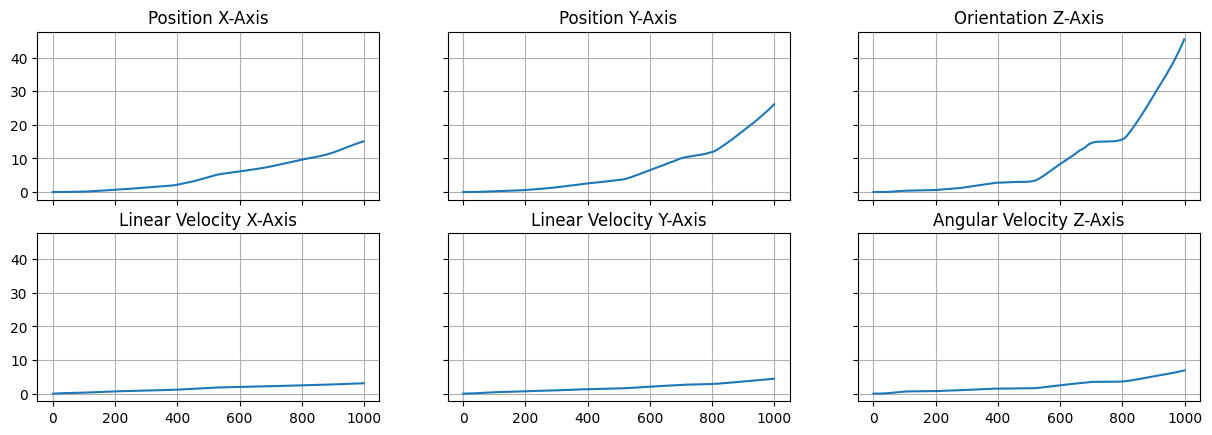

In [46]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
ax[0, 0].plot(range(it), pos[0, :])
ax[0, 1].plot(range(it), pos[1, :])
ax[0, 2].plot(range(it), pos[2, :])

ax[1, 0].plot(range(it), vel[0, :])
ax[1, 1].plot(range(it), vel[1, :])
ax[1, 2].plot(range(it), vel[2, :])
ax[0, 0].set_title('Position X-Axis')
ax[0, 1].set_title('Position Y-Axis')
ax[0, 2].set_title('Orientation Z-Axis')
ax[1, 0].set_title('Linear Velocity X-Axis')
ax[1, 1].set_title('Linear Velocity Y-Axis')
ax[1, 2].set_title('Angular Velocity Z-Axis')

for i in range(2):
    for j in range(3):
        ax[i, j].grid(True)
fig.set_figwidth(15)
plt.show()

In [43]:
np.linalg.norm(vel[:, 2][:2])

0.005539132032432505

In [44]:
a = mass_inv.dot(force)
t = 1000*0.01

distance = 0.5 * a * t**2
velocity = a * t
print(distance, velocity)

[9.79189456 9.79189456 0.        ] [1.95837891 1.95837891 0.        ]
